<a href="https://colab.research.google.com/github/Riccardo9900/Progetto_ML/blob/main/Progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importo librerie
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
#importo librerie di deep learning
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, Activation, MaxPooling2D
from keras.models import Model, Sequential

In [3]:
from google.colab import files
files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:
!unzip archive\ \(1\).zip

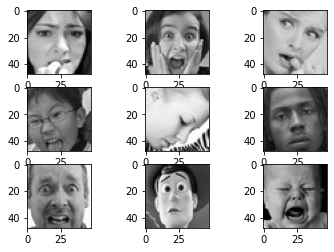

In [10]:
for i in range(1,10,1):
  plt.subplot(3,3,i)
  img = load_img("/content/train/"+'fear'+"/" + os.listdir('/content/train/' + 'fear')[i], target_size=(48,48))
  plt.imshow(img)
plt.show()

In [11]:
batch_size = 32 #Quanti esempi il modello prende in un'iterazione

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

#uso categorical così divide le classi differenti, me ne aspetto 7

train_set = datagen_train.flow_from_directory('/content/train',
                                              target_size = (48,48),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True) #è l'oggetto di imagedatagenerator
test_set = datagen_test.flow_from_directory('/content/test',
                                              target_size = (48,48),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True) #è l'oggetto di imagedatagenerator

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
numero_classi = 7

model = Sequential()

#1 strato CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#1 strato CNN
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#2 strato CNN
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#2 strato CNN
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#cambio il formato da matrice a vettore
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(numero_classi, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [ ]:
history = model.fit_generator(generator = train_set,
                              steps_per_epoch= train_set.n//train_set.batch_size,
                              epochs = 30,
                              validation_data = test_set,
                              validation_steps = test_set.n//test_set.batch_size)

In [ ]:
model.save("my_model2.h5")

In [12]:
from keras.models import load_model

my_model = load_model("my_model2.h5", compile = True)

In [13]:
my_model.evaluate(test_set)

225/225 [==============================] - 10s 39ms/step - loss: 1.3108 - accuracy: 0.5843


[1.310790777206421, 0.584285318851471]

In [14]:
test_img, test_lbl = test_set.__next__()
predictions = my_model.predict(test_img)

#Mi ritornano un valore massimo corrispondente alla classe, lo prendo con np.argmax

predictions = np.argmax(predictions, axis = 1)
test_labels = np.argmax(test_lbl, axis = 1) 

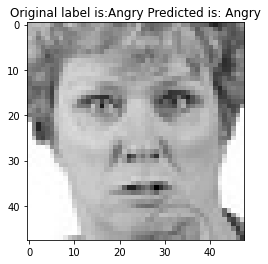

In [17]:
class_labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

import random 
n = random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap = 'gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+pred_labl)
plt.show()